<a href="https://colab.research.google.com/github/Jobby-John/supervised-learning/blob/main/IP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables

METRIC OF SUCCESS
The success of this project relies on how accurate the models created can predict the cost of a house using the independent variables provided in the case study

ASSUMPTIONS
We are looking the prices of the houses in 2020
Our dependent data will be the house price
Independent variables in our dataset will be
*Number of Bedrooms
*Number of Bathrooms
*The Square feet area of living area
*The Square feet area of parking Layout
*The Number of Floors
*Whether waterfront is there or not
*The Grade of the house
*The sqft_above
*The Square feet area off basement
*The age of the house
*sqft_living15
*sqft_lot15

In [1]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import warnings

In [2]:
#importing the file for analysis
df=pd.read_csv('df.csv')
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Checking our data details

In [3]:
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 

In [6]:
df.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
#checking for null values 
df.isnull

<bound method DataFrame.isnull of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 

In [8]:
#checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

EDA 

In [9]:
#The first step will be to drop all the columns that do not add value in our dataset
# some of these columns include id,view,latitude,longitude,zipcode
df=df.drop(columns=['yr_renovated','id','view','zipcode','lat','long'])

In [10]:
#we will create another column and we will make an assumption that we are selling the house in the year 2020
#Thus we will create a new column age which will be made of 2020 substract the year the house was built
df['age']=2020-df['yr_built']
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,1800,7503,33


In [11]:
#After creating the column age we can go ahead and drop the column of year built
df=df.drop(columns=['yr_built'])

In [12]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,33


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  sqft_living15  21613 non-null  int64  
 12  sqft_lot15     21613 non-null  int64  
 13  age            21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [14]:
#investigating missing values
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


Checking the correlations of the variables


In [15]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.667463,0.605566,0.323837,0.585374,0.082456,-0.053982
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,0.477600,0.303093,0.391638,0.029244,-0.154178
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,0.685342,0.283770,0.568634,0.087175,-0.506019
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,0.876597,0.435043,0.756420,0.183286,-0.318049
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,0.183512,0.015286,0.144608,0.718557,-0.053080
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,0.523885,-0.245705,0.279885,-0.011269,-0.489319
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,0.072075,0.080588,0.086463,0.030703,0.026161
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,-0.158214,0.174105,-0.092824,-0.003406,0.361417
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,0.755923,0.168392,0.713202,0.119248,-0.446963
sqft_above,0.605566,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,-0.158214,0.755923,1.000000,-0.051943,0.731870,0.194050,-0.423898


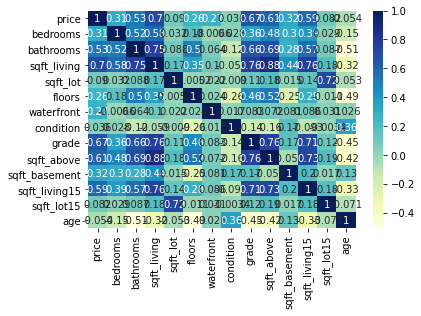

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

DATA ANALYSIS

In [70]:
# Detailed statistics including range, quartile, kurtosis and skewness
col_names = ['price','bathrooms','sqft_living','sqft_lot','grade','sqft_living15']
for i, col_val in enumerate(col_names):
    print("Mean:", df[col_val].mean())
    print("Median:", df[col_val].median())
    print("Mode:", df[col_val].mode())
    print("SD:", df[col_val].std())
    print("Variance:", df[col_val].var())
    # print("Range:", col_val_max - col_val_min)
    print("Quartiles:", df[col_val].quantile([0.25,0.5,0.75]))
    print("Skewness:", df[col_val].skew())
    print("Kurtosis:", df[col_val].kurt())
    print("\n")

Mean: 540182.1587933188
Median: 450000.0
Mode: 0    350000.0
1    450000.0
dtype: float64
SD: 367362.23171800975
Variance: 134955009292.83669
Quartiles: 0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64
Skewness: 4.021715573048684
Kurtosis: 34.522444410072566


Mean: 2.1147573219821405
Median: 2.25
Mode: 0    2.5
dtype: float64
SD: 0.7701631572177287
Variance: 0.5931512887355798
Quartiles: 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64
Skewness: 0.5111075733474171
Kurtosis: 1.2799024441754554


Mean: 2079.8997362698374
Median: 1910.0
Mode: 0    1300
dtype: int64
SD: 918.4408970468115
Variance: 843533.6813681518
Quartiles: 0.25    1427.0
0.50    1910.0
0.75    2550.0
Name: sqft_living, dtype: float64
Skewness: 1.471555426802092
Kurtosis: 5.24309298981711


Mean: 15106.967565816869
Median: 7618.0
Mode: 0    5000
dtype: int64
SD: 41420.51151513548
Variance: 1715658774.1754704
Quartiles: 0.25     5040.0
0.50     7618.0
0.75    10688.0
Na

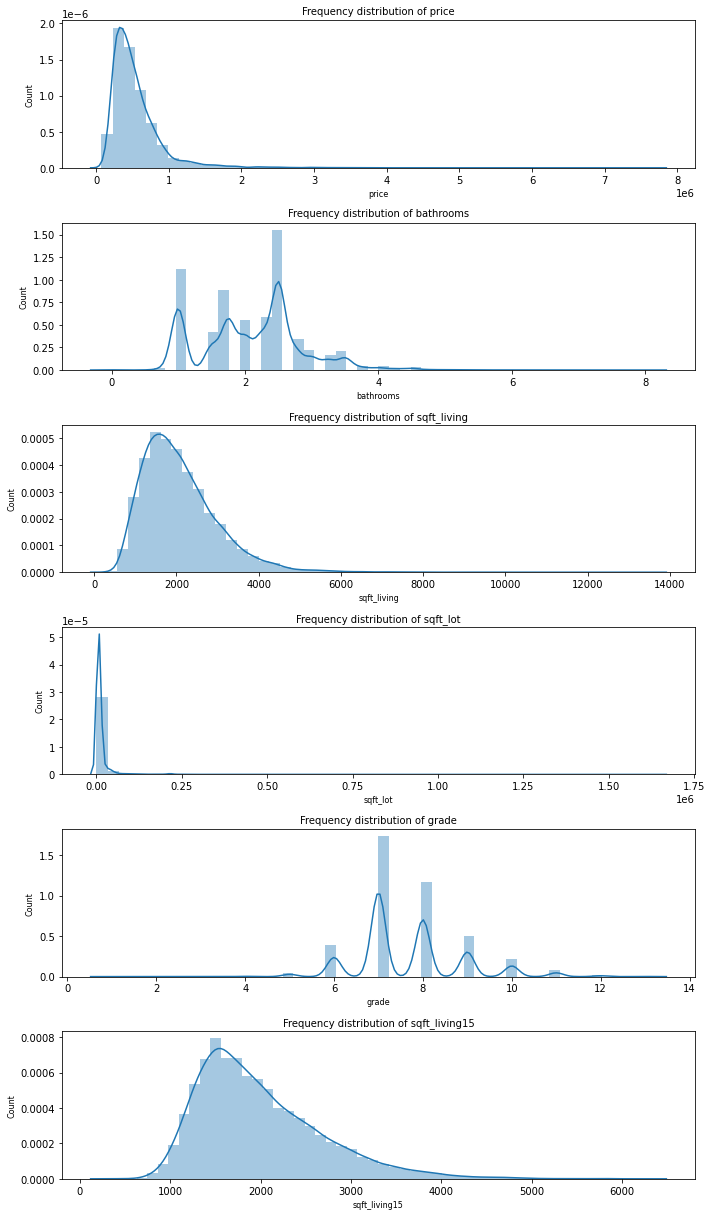

In [71]:
# Plotting distribution of numerical variables
col_names = ['price','bathrooms','sqft_living','sqft_lot','grade','sqft_living15']
fig, ax = plt.subplots(len(col_names), figsize=(10,17))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

Checking for multicollinearity

In [17]:
# Multicollinearity & VIF checks

corr = df.corr()
print ('Correlation matrix')
print ('....')
print(corr)

print ('VIF matrix')
print ('....')
pd.DataFrame(np.linalg.inv(df.corr().values), index = corr.index, columns=corr.columns)

Correlation matrix
....
                  price  bedrooms  ...  sqft_lot15       age
price          1.000000  0.308338  ...    0.082456 -0.053982
bedrooms       0.308338  1.000000  ...    0.029244 -0.154178
bathrooms      0.525134  0.515884  ...    0.087175 -0.506019
sqft_living    0.702044  0.576671  ...    0.183286 -0.318049
sqft_lot       0.089655  0.031703  ...    0.718557 -0.053080
floors         0.256786  0.175429  ...   -0.011269 -0.489319
waterfront     0.266331 -0.006582  ...    0.030703  0.026161
condition      0.036392  0.028472  ...   -0.003406  0.361417
grade          0.667463  0.356967  ...    0.119248 -0.446963
sqft_above     0.605566  0.477600  ...    0.194050 -0.423898
sqft_basement  0.323837  0.303093  ...    0.017276  0.133124
sqft_living15  0.585374  0.391638  ...    0.183192 -0.326229
sqft_lot15     0.082456  0.029244  ...    1.000000 -0.070958
age           -0.053982 -0.154178  ...   -0.070958  1.000000

[14 rows x 14 columns]
VIF matrix
....


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
price,2.839398,0.305614,-0.288079,-9.742462e-01,-0.008511,-0.125767,-0.479952,-0.093333,-1.123802,-1.456582e-01,-1.546561e-01,-0.177676,0.115490,-0.863605
bedrooms,0.305614,1.665622,-0.478923,-2.513373e-01,0.047612,0.064442,0.053985,-0.081675,0.222468,-7.728490e-01,-3.961712e-01,0.012775,0.095523,-0.151044
bathrooms,-0.288079,-0.478923,3.317637,-4.957097e+00,-0.017253,-0.683796,0.026689,-0.083110,-0.189668,3.311315e+00,1.358200e+00,0.122440,0.057993,0.888584
sqft_living,-0.972218,-0.249078,-4.955468,-3.362747e+13,-0.147884,0.526706,0.409867,-0.327057,-0.460236,3.031943e+13,1.620428e+13,-1.044715,-0.230529,-1.440280
sqft_lot,-0.008511,0.047612,-0.017253,-1.472521e-01,2.086116,0.072889,0.012170,0.017231,-0.009184,-9.751496e-02,4.119263e-02,0.117280,-1.474720,-0.026145
floors,-0.125767,0.064442,-0.683796,5.186286e-01,0.072889,1.931614,-0.008752,0.146545,-0.287658,-8.586082e-01,3.273394e-01,0.358424,0.094497,0.305809
waterfront,-0.479952,0.053985,0.026689,4.098512e-01,0.012170,-0.008752,1.105607,0.010993,0.170049,-2.914747e-01,-1.917705e-01,-0.000769,-0.037878,0.064799
condition,-0.093333,-0.081675,-0.083110,-3.260437e-01,0.017231,0.146545,0.010993,1.191540,0.027126,3.635271e-01,1.053753e-01,0.028513,-0.036474,-0.362802
grade,-1.123802,0.222468,-0.189668,-4.711166e-01,-0.009184,-0.287658,0.170049,0.027126,3.653416,-6.484502e-01,-1.181836e-01,-0.790466,0.073381,0.693670
sqft_above,-0.145347,-0.773983,3.309427,3.031943e+13,-0.096936,-0.865938,-0.291439,0.364384,-0.657632,-2.733681e+13,-1.461022e+13,-0.594978,-0.048203,1.260288


From the multicollinearity analysis we can see that our correlation falls between 0-5 which shows that our data is not highly correlated. This is a good thing because our independent variables are not highly correlated. This makes the our data reliable. 

MULTIPLE LINEAR REGRESSION

In [ ]:
# we will start by defining our x and y values
X=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement' 	
      ,'sqft_living15','sqft_lot15','age']]
y=df['price']

In [68]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.fit(X_test,y_test)
y_pred=regressor.predict(X_test)
print(y_pred)
print('*******************************************************************')
print(regressor.coef_)
print('*******************************************************************')
print(regressor.intercept_)

[ 469014.10281373  697086.21508134 -526239.57527411 ... 1110794.86165383
  412479.08963603  539600.84687272]
*******************************************************************
[-4.86928331e+04  6.48590323e+04  1.37044598e+02  1.95010673e-01
  4.67150011e+04  8.19085249e+05  9.83831686e+03  1.08453592e+05
  5.09456998e+01  8.60988975e+01  1.47607625e+01 -7.00112436e-01
  4.33406743e+03]
*******************************************************************
-1004791.2293708092


Quantiles Regression and Linear Regression

In [ ]:
# we will start by defining our x and y values
X=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement' 	
      ,'sqft_living15','sqft_lot15','age']]
y=df['price']

In [42]:
#We will start off with linear regression
regressor=LinearRegression()
regressor.fit(X,y)
First_pred=(mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(First_pred)

47527250973.198616


In [43]:
#quartiles regression
!pip install mlinsights


     |████████████████████████████████| 2.0MB 5.2MB/s 
     |████████████████████████████████| 133kB 27.5MB/s 


In [44]:
from mlinsights.mlmodel import QuantileLinearRegression
# creting and object for quantile regression
clq = QuantileLinearRegression()

In [ ]:
# fitting the model

clq.fit(X_train, y_train)

In [52]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(X_train, y_train)

[QuantileLinearRegression.fit] iter=1 error=2429620350.9400334
[QuantileLinearRegression.fit] iter=2 error=2396958247.5980053
[QuantileLinearRegression.fit] iter=3 error=2383374935.6759524
[QuantileLinearRegression.fit] iter=4 error=2368702344.990824
[QuantileLinearRegression.fit] iter=5 error=2357867621.194404
[QuantileLinearRegression.fit] iter=6 error=2348516967.860114
[QuantileLinearRegression.fit] iter=7 error=2341592933.589291
[QuantileLinearRegression.fit] iter=8 error=2336499480.8283653
[QuantileLinearRegression.fit] iter=9 error=2331532040.9334884
[QuantileLinearRegression.fit] iter=10 error=2327755908.6418147
[QuantileLinearRegression.fit] iter=11 error=2325608827.182585
[QuantileLinearRegression.fit] iter=12 error=2323930586.2566786
[QuantileLinearRegression.fit] iter=13 error=2322796227.1107388
[QuantileLinearRegression.fit] iter=14 error=2321738472.619321
[QuantileLinearRegression.fit] iter=15 error=2321067193.4492617
[QuantileLinearRegression.fit] iter=16 error=2320418236

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
                         max_iter=20, n_jobs=1, normalize=False, quantile=0.5,
                         verbose=True)

In [56]:
clq.score(X_test, y_test)

136320.18123407115

RIDGE REGRESSION AND LINEAR REGRESSION

In [19]:
regressor=LinearRegression()
regressor.fit(X,y)
First_pred=(mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(First_pred)

47527250973.198616


Ridge regression

In [20]:
ridge=Ridge(normalize=True)
search=GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,3,8)}, scoring='neg_mean_squared_error', n_jobs=1, iid='deprecated', refit=True, cv=10)

In [21]:
search.fit(X,y)


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-05, 1.38949549e-04, 1.93069773e-03, 2.68269580e-02,
       3.72759372e-01, 5.17947468e+00, 7.19685673e+01, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [22]:
search.best_params_

{'alpha': 0.0019306977288832496}

In [23]:
#From running our code the best alpha value to use in our model is 0.0019
{'alpha':0.0019}
abs(search.best_score_)

48181021215.781006

In [24]:
#ridge part
ridge=Ridge(normalize=True,alpha=0.0019)
ridge.fit(X,y)
second_pred=(mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_pred)


47527547851.01084


In [25]:
print(f'Ridge score : {ridge.score(X, y)}')

Ridge score : 0.6478104278769149


From the two results(I.e the linear regression and the ridge regression) there is no big differences in the outputs. We can therefore come into conclusion that the coefficient values are about the same and this means that the penalization made little difference with this dataset.

LASSO REGRESSION AND LINEAR REGRESSION 2

In [26]:
regressor=LinearRegression()
regressor.fit(X,y)
First_pred=(mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(First_pred)

47527250973.198616


In [27]:
#Lasso regression
scaler=StandardScaler()
scaler.fit(X,y)
X=scaler.transform(X)

In [28]:
Lasso=linear_model.Lasso()
Lasso.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31768690356740.875, tolerance: 291664766083.6765
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
print("Lasso score:", Lasso.score(X, y)) 
print("Lasso MSE:", mean_squared_error(y, Lasso.predict(X))) 
print("Lasso coef:", Lasso.coef_) 

Lasso score: 0.6478126275424021
Lasso MSE: 47527251008.86963
Lasso coef: [ -39538.4021894    37264.12403517  268784.49038601    1098.02884502
   16271.06520899   62094.21053026   12074.12590651  145396.41699747
 -110122.25743493  -49108.43253138   22981.4032888   -14938.81662221
  111728.25030549]


In [30]:
#We can further split the data and employ the Lasso regression to see how the various models work
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6601853454811046
linear score: 0.6601887874713079
lasso MSE: 48242423792.872475
linear MSE: 48241935144.287506
lasso best estimator coef: [-40786.9080672   32303.57940746 214975.18271906   2174.9622381
  18125.43900692  59183.7330454   13821.00910911 145657.86159059
 -60747.85128243 -23413.73802081  24263.68177281 -14949.27785736
 110599.47173985]
linear coef: [-40815.79682776  32465.69593515  77463.14045341   2245.31701631
  18133.8062098   59200.33937458  13846.1816984  145612.34684662
  63068.45518671  42747.32117084  24403.37144508 -15018.41372148
 110661.60963647]


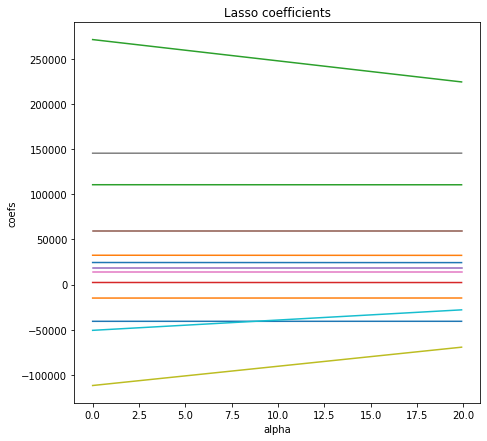

In [31]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

ELASTIC NET REGRESSION AND LINEAR REGRESSION

In [32]:
regressor=LinearRegression()
regressor.fit(X,y)
First_pred=(mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(First_pred)

47527250973.198616


ELASTIC NET REGRESSION

In [33]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [34]:
elastic=ElasticNet(normalize=True,alpha=0.0019,l1_ratio=0.75)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0019, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
second_pred=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_pred)

93379828916.41707


In [36]:
# Elastic net score 

elastic.score(X_test, y_test)
# 
#The elastic score is 31.29 which is a bit poor. 

0.3129295496088934

From our analysis above, we can see that the different regressions have different prediction success. However, from our data, we can see that Lasso and ridge regression prediction system was at around 64.78% in both while in elasting the prediction score was at around 31%. Thus, I would advise the company to utilize either the ridge or Lasso regression models as they seem to be having a high success rate compared to the other models when it comes to house prices prediction. 